In [52]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("data.csv")

In [11]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
print(X_train.shape)

torch.Size([614, 8])


In [10]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [43]:
class SimpleANN(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x
        

In [63]:
torch.manual_seed(20)
ann = SimpleANN()

In [64]:
ann.parameters

<bound method Module.parameters of SimpleANN(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [65]:
ann.parameters()

<generator object Module.parameters at 0x0000021B4DBD1148>

In [66]:
loss_function=nn.CrossEntropyLoss()
optim = torch.optim.Adam(ann.parameters(), lr=0.01)

In [67]:
import time
start = time.time()
epochs=10000
final_loss=[]

for i in range(epochs):
    
    y_pred=ann.forward(X_train)
    loss=loss_function(y_pred,y_train)
    
    final_loss.append(loss.item())
    
    if (i+1)%100 == 0:
        print(f"Epoch: {i+1} | Loss: {loss.item()}")
        
    optim.zero_grad()
    loss.backward()
    optim.step()
    
end = time.time()

print("time taken:", end-start)

Epoch: 100 | Loss: 0.5063002705574036
Epoch: 200 | Loss: 0.44328904151916504
Epoch: 300 | Loss: 0.4042840898036957
Epoch: 400 | Loss: 0.37870198488235474
Epoch: 500 | Loss: 0.36796247959136963
Epoch: 600 | Loss: 0.3643849790096283
Epoch: 700 | Loss: 0.3220682740211487
Epoch: 800 | Loss: 0.30313965678215027
Epoch: 900 | Loss: 0.3857046365737915
Epoch: 1000 | Loss: 0.2787249684333801
Epoch: 1100 | Loss: 0.26574593782424927
Epoch: 1200 | Loss: 0.2662355899810791
Epoch: 1300 | Loss: 0.25911152362823486
Epoch: 1400 | Loss: 0.2517794370651245
Epoch: 1500 | Loss: 0.24227875471115112
Epoch: 1600 | Loss: 0.23117274045944214
Epoch: 1700 | Loss: 0.243038609623909
Epoch: 1800 | Loss: 0.21759870648384094
Epoch: 1900 | Loss: 0.21123935282230377
Epoch: 2000 | Loss: 0.20796218514442444
Epoch: 2100 | Loss: 0.20095902681350708
Epoch: 2200 | Loss: 0.2007753998041153
Epoch: 2300 | Loss: 0.2214009016752243
Epoch: 2400 | Loss: 0.20400486886501312
Epoch: 2500 | Loss: 0.21032239496707916
Epoch: 2600 | Loss: 0

Text(0.5, 0, 'Epoch')

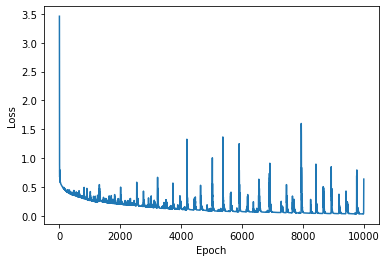

In [69]:
plt.plot(range(epochs),final_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=ann(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())